# Kaggle Digit Recognizer

Train a model on the MNIST data set to predict the digits in the test set

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import multilayer_perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
dftrain = pd.read_csv('train.csv')

In [3]:
dftrain.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dftrain.shape

(42000, 785)

The images are gray-scale with 28 pixles in height and 28 pixels in width. So we have a total of 784 features. The pixel value is between 0 and 255 inclusive with higher numbers meaning darker. 

To understand this, we look at one particular row and reconstruct the image. 

In [5]:
im0 = dftrain.iloc[0, :].values[1:] #droping the value in the label column

In [6]:
im0sq = im0.reshape(28, 28)

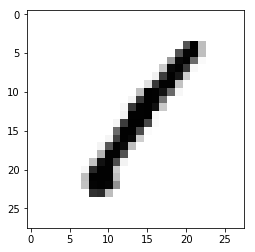

In [7]:
plt.imshow(im0sq, cmap = 'Greys');

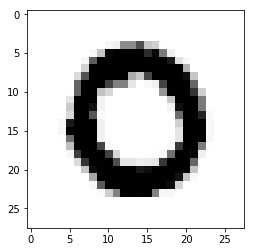

In [8]:
im1 = dftrain.iloc[1, :].values[1:] #droping the value in the label column
im1sq = im1.reshape(28, 28)
plt.imshow(im1sq, cmap = 'Greys');

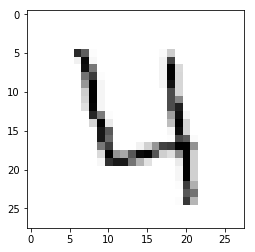

In [9]:
im3 = dftrain.iloc[3, :].values[1:] #droping the value in the label column
im3sq = im3.reshape(28, 28)
plt.imshow(im3sq, cmap = 'Greys');

In [10]:
dftrain.isnull().values.sum()

0

No missing values at all. We have done data explorations. The features are decided, we can dive right into machine learning. 

Note that this is a multiclass classification problem. 

In [11]:
X = dftrain.drop('label', axis = 1)
y = dftrain.label

Splitting the data into train and test sets. We use the stratify option to make sure that all target labels are present in both train and test set.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

### PCA

We notice that many pixels have the value 0. This typically corresponds to pixels that are on the edge of the image. Because we have many features in this case, we want to find the ones that matter the most and use them to train our model. 

One way to find the features that matter the most is to find the features that have the higest variance and this can be accomplished through PCA. But before we use PCA, we want to mean normalize our features. 

In [20]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)

In [21]:
pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [22]:
pca.n_components_

784

In [23]:
pca.explained_variance_

array([  4.06955098e+01,   2.91107725e+01,   2.67826994e+01,
         2.08142238e+01,   1.80995896e+01,   1.57872978e+01,
         1.38240715e+01,   1.25429656e+01,   1.10636340e+01,
         1.00886865e+01,   9.63594259e+00,   8.65558861e+00,
         8.04101326e+00,   7.88067927e+00,   7.43619854e+00,
         7.16726634e+00,   6.73522339e+00,   6.61636220e+00,
         6.42339284e+00,   6.26811750e+00,   5.93946237e+00,
         5.74915143e+00,   5.48813812e+00,   5.32636794e+00,
         5.15204771e+00,   4.94719219e+00,   4.88841932e+00,
         4.70765936e+00,   4.46517927e+00,   4.36341313e+00,
         4.32532851e+00,   4.22702259e+00,   4.08716782e+00,
         4.06167097e+00,   3.99893913e+00,   3.86795787e+00,
         3.81916746e+00,   3.71247668e+00,   3.57429027e+00,
         3.45879390e+00,   3.41428712e+00,   3.36937835e+00,
         3.25685428e+00,   3.24001109e+00,   3.18305370e+00,
         3.16279109e+00,   3.14236559e+00,   3.09280451e+00,
         3.06360759e+00,